<a href="https://colab.research.google.com/github/sinhajiya/Face_Recognition_from_Features_using_Yale_Face_Database/blob/main/DSP_Project_LoG%26GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data directly from github repo using Github API

In [ ]:
import os
import requests

# GitHub API URL for the processed_data folder
api_url = "https://api.github.com/repos/sinhajiya/Face_Recognition_from_Features_using_Yale_Face_Database/contents/processed_data"

# Headers to increase request limit (optional)
headers = {
    "Accept": "application/vnd.github.v3+json"
}

# Directory to save files locally
save_dir = "processed_data"
os.makedirs(save_dir, exist_ok=True)

# Get the list of files from the API
response = requests.get(api_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    files = response.json()

    # Loop over the files and download them
    for file in files:
        file_name = file['name']
        download_url = file['download_url']

        print(f"Downloading {file_name} ...")
        file_response = requests.get(download_url)

        if file_response.status_code == 200:
            # Save file locally
            with open(os.path.join(save_dir, file_name), "wb") as f:
                f.write(file_response.content)
            print(f"Successfully downloaded {file_name}")
        else:
            print(f"Failed to download {file_name}")
else:
    print(f"Failed to retrieve file list from GitHub API, status code: {response.status_code}")

Successfully downloaded subject01.centerlight.npy
Successfully downloaded subject01.glasses.npy
Successfully downloaded subject01.happy.npy
Successfully downloaded subject01.leftlight.npy
Successfully downloaded subject01.noglasses.npy
Successfully downloaded subject01.normal.npy
Successfully downloaded subject01.rightlight.npy
Successfully downloaded subject01.sad.npy
Successfully downloaded subject01.sleepy.npy
Successfully downloaded subject01.surprised.npy
Successfully downloaded subject01.wink.npy
Successfully downloaded subject02.centerlight.npy
Successfully downloaded subject02.glasses.npy
Successfully downloaded subject02.happy.npy
Successfully downloaded subject02.leftlight.npy
Successfully downloaded subject02.noglasses.npy
Successfully downloaded subject02.normal.npy
Successfully downloaded subject02.rightlight.npy
Successfully downloaded subject02.sad.npy
Successfully downloaded subject02.sleepy.npy
Successfully downloaded subject02.surprised.npy
Successfully downloaded sub

## **Laplacian of Gaussian (LoG).**

---



In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Directory where the original .npy files are stored
data_dir = "processed_data"
# Directory to save the transformed .npy files
log_dir = os.path.join(data_dir, "LoG_transformed")
os.makedirs(log_dir, exist_ok=True)

# List all .npy files in the directory
npy_files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]


# Function to apply Laplacian of Gaussian (LoG) transformation
def laplacian_of_gaussian(image, kernel_size=3):
    # Convert the image to CV_64F before applying GaussianBlur
    blurred_image = cv2.GaussianBlur(image.astype(np.float64), (kernel_size, kernel_size), 0)
    log_image = cv2.Laplacian(blurred_image, cv2.CV_64F)
    return log_image

# Process and save each image
for file_name in npy_files:
    # Load the .npy file
    image_path = os.path.join(data_dir, file_name)
    image = np.load(image_path)

    # apply LoG transformation
    log_image = laplacian_of_gaussian(image)

    # Save the transformed image as a new .npy file
    transformed_path = os.path.join(log_dir, file_name)
    np.save(transformed_path, log_image)
    print(f"Transformed and saved: {transformed_path}")

Transformed and saved: processed_data/LoG_transformed/subject10.sad.npy
Transformed and saved: processed_data/LoG_transformed/subject04.normal.npy
Transformed and saved: processed_data/LoG_transformed/subject15.sad.npy
Transformed and saved: processed_data/LoG_transformed/subject06.happy.npy
Transformed and saved: processed_data/LoG_transformed/subject05.happy.npy
Transformed and saved: processed_data/LoG_transformed/subject01.rightlight.npy
Transformed and saved: processed_data/LoG_transformed/subject11.sleepy.npy
Transformed and saved: processed_data/LoG_transformed/subject06.noglasses.npy
Transformed and saved: processed_data/LoG_transformed/subject08.sad.npy
Transformed and saved: processed_data/LoG_transformed/subject05.normal.npy
Transformed and saved: processed_data/LoG_transformed/subject07.happy.npy
Transformed and saved: processed_data/LoG_transformed/subject04.noglasses.npy
Transformed and saved: processed_data/LoG_transformed/subject12.leftlight.npy
Transformed and saved: p

The code applies Laplacian of Gaussian(LoG), and then stores all the transformed images in the folder named as "LoG_transformed".

### **Some code to display the output, inshort display the "LoG_transformed" images**.

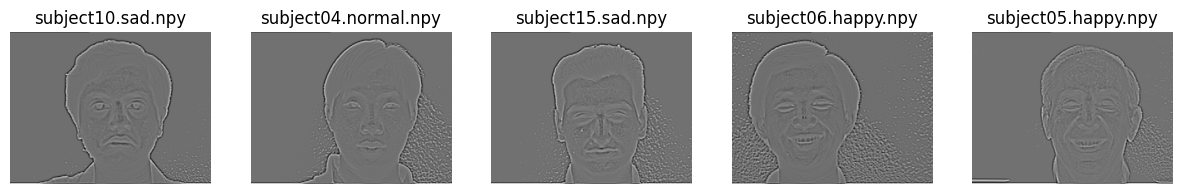

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory where the LoG transformed .npy files are saved
log_dir = "processed_data/LoG_transformed"

# List all .npy files in the LoG transformed directory
log_files = [f for f in os.listdir(log_dir) if f.endswith('.npy')]

# Number of images to display
num_images_to_display = 5

# Set up a horizontal subplot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

for i, file_name in enumerate(log_files[:num_images_to_display]):
    # Load the transformed .npy file
    log_image_path = os.path.join(log_dir, file_name)
    log_image = np.load(log_image_path)

    # Add subplot in a 1x5 grid (1 row, 5 columns)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(log_image, cmap='gray')
    plt.title(file_name)
    plt.axis('off')

plt.show()

## **Gray Level Co-occurence Matrix (GLCM)**

---

Since GLCM doesn’t directly produce a transformed image but rather a set of feature values, we’ll save these feature values as a numerical vector for each image.

Steps:
1. Load each `.npy` image file from the processed_data directory.
2. Compute the GLCM for each image using `skimage.feature.greycomatrix`.
3. Extract texture features from the GLCM, such as contrast, energy, homogeneity, and correlation.
4. Save these features in a new directory `(processed_data/glcm_features)` as .npy files.

In [ ]:
import os
import numpy as np
import pandas as pd
from skimage import feature

# Define paths
data_folder = 'processed_data'
output_folder = os.path.join(data_folder, 'glcm_features')

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to calculate GLCM features
def calculate_glcm_features(image):

    # Scale the image to the range [0, 255] for GLCM calculation
    gray_image_scaled = (image * 255).astype(np.uint8)

    # Calculate GLCM
    glcm = feature.graycomatrix(gray_image_scaled, [1], [0], symmetric=True, normed=True)

    # Extract features
    features = {
        'contrast': feature.graycoprops(glcm, 'contrast')[0, 0],
        'dissimilarity': feature.graycoprops(glcm, 'dissimilarity')[0, 0],
        'homogeneity': feature.graycoprops(glcm, 'homogeneity')[0, 0],
        'energy': feature.graycoprops(glcm, 'energy')[0, 0],
        'correlation': feature.graycoprops(glcm, 'correlation')[0, 0],
        'entropy': -np.sum(glcm[0] * np.log2(glcm[0] + 1e-10))  # Adding small value to avoid log(0)
    }

    return features

# Iterate through images in the processed_data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.npy') and filename != 'LoG_transformed':
        image_path = os.path.join(data_folder, filename)
        image = np.load(image_path)

        # Calculate features
        features = calculate_glcm_features(image)

        # Save features to a CSV file
        feature_vector = pd.DataFrame(features, index=[0])
        feature_vector.to_csv(os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_features.csv'), index=False)

print("Feature extraction completed and saved in", output_folder)

Feature extraction completed and saved in processed_data/glcm_features
